# > **`Badal Parmar`**

# > **`DBSCAN`**


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
class DBSCAN:

  def __init__ (item, epsi=2, minpts1=15):
    item.epsi = epsi
    item.minpts1 = minpts1
    item.cls = []
    item.c_o = []
    item.n_o = []

  def predict (item, X):
    item.X = np.array(X)
    item.samples, item.features = X.shape
    uv = list(range(item.samples))
    visit = []

    while len(uv):

      # Randomly selecting an uv object
      random_object = np.random.choice(uv, 1)[0]
      uv.remove(random_object)
      visit.append(random_object)

      # Finding the objects in epsi neigbourhood
      epsi_neighbourhood = item.find_epsi_neighbours(random_object)

      if len(epsi_neighbourhood) >= item.minpts1:

        # Adding to core objects
        item.c_o.append(random_object)

        # Creating a new cluster
        new_cluster = [random_object]
        while len(epsi_neighbourhood):
          point = epsi_neighbourhood.pop(0)

          if point in uv:
            uv.remove(point)
            visit.append(point)

            # Exploring the epsi neigbourhood of the point
            point_neighbourhood = item.find_epsi_neighbours(point)

            if len(point_neighbourhood) >= item.minpts1:
              item.c_o.append(point)
              for each in point_neighbourhood:
                epsi_neighbourhood.append(each)
          
          # Adding the point to the cluster if not already a part of one
          if not item.is_cm(point):
            new_cluster.append(point)

        item.cls.append(new_cluster)

      else:
        # Adding to the noise objects
        item.n_o.append(random_object)

  def find_epsi_neighbours(item, point):
    neighbours = []
    for i in range(item.samples):
      if i!=point:
        distance = item.ed(item.X[point],item.X[i])
        if distance <= item.epsi:
          neighbours.append(i)

    return neighbours

  def ed(item, x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))  

  def is_cm(item, point):
    included = False
    for cluster in item.cls:
      if point in cluster:
        included = True
        break
    return included

  def plot(item):
    fig, ax = plt.subplots(figsize=(8,6))

    for i, index in enumerate(item.cls):
      point = item.X[index].T
      ax.scatter(*point[0:2], s=15, label='Cluster '+str(i+1))
      ax.legend()
    
    ax.scatter(*(item.X[item.n_o].T)[0:2], color="black", s=30, linewidth=2, label='Noise')
    ax.legend()

    plt.show()

  def print_table(item):
    table = {'Point no.':[], 'visit':[], 'Core':[], 'Cluster no.':[]}
    for _ in range(item.samples):
      table['Point no.'].append(_)
      table['visit'].append(1)
      table
      
      if _ in item.c_o:
        table['Core'].append(1)
      else:
        table['Core'].append(0)

      cm = False
      for i in range(len(item.cls)):
        if _ in item.cls[i]:
          table['Cluster no.'].append(i+1)
          cm = True
          break
      
      if not cm:
        table['Cluster no.'].append('Noise')

    return pd.DataFrame.from_dict(table,)


Dataset: Iris Flower


Enter the value of epsi for DBSCAN: 1

Enter the number of minimum points for DBSCAN: 15

The value of epsi is 1.0 and the value of minpts1 is 15.

The number of cls found after running the algorithm is 2

cls are displayed below using color codes: 


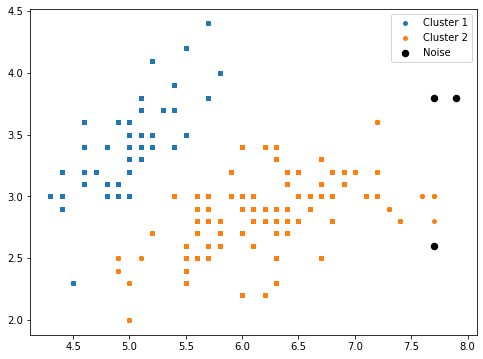

In [ ]:
print ('\nDataset: Iris Flower\n')

epsi = float(input("\nEnter the value of epsi for DBSCAN: "))
minpts1 = int(input('\nEnter the number of minimum points for DBSCAN: '))

print('\nThe value of epsi is {} and the value of minpts1 is {}.'.format(epsi, minpts1))

model = DBSCAN(epsi,minpts1)
model.predict(X)

print('\nThe number of cls found after running the algorithm is {}'.format(len(model.cls)))

print('\ncls are displayed below using color codes: ')

model.plot()

In [ ]:
table = model.print_table()

table.to_csv('18BCP011_Table_DBSCAN.csv',index=False)

# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
# All dataframes hereafter reflect these changes.
display(table)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


,Point no.,visit,Core,Cluster no.
0,0,1,1,2
1,1,1,1,2
2,2,1,1,2
3,3,1,1,2
4,4,1,1,2
5,5,1,1,2
6,6,1,1,2
7,7,1,1,2
8,8,1,1,2
9,9,1,1,2
